# Numpy

In [ ]:
import numpy as np

># 1. ndarray - generating ndarray object
* Similar to `list` in python - slicing & indexing available

### np.array()
* creates `ndarray` object
* used to represent vectors & matrices

In [18]:
arr1 = np.array([1, 3, 4, 6]) # 1d vector
arr2 = np.array([[0, 1, 2], [2, 4, 6]]) # 2d matrix

### np.arange(start, end, step)
* similar to `range(start, end, step)` in python / returns ndarray

In [1]:
arr3 = np.arange(1, 11)
print(arr3, type(arr3))

[ 1  2  3  4  5  6  7  8  9 10] <class 'numpy.ndarray'>


### np.linspace(start, end, n)
* (n-1) slicing from start ~ end

In [3]:
arr4 = np.linspace(0, 100, 11)
print(arr4)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


### np.zeros((shape)) & np.ones((shape))
* returns ndarray of zeros/ones

In [14]:
print(np.zeros((2,4)),np.ones((2,4)),sep='\n')

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


># 2. ndarray - operations on ndarray

### basic operations

In [78]:
arr = np.array([1,2,3,4,5])
print(arr)

print(np.min(arr)) #minimum element
print(np.max(arr)) #maximum element

print(np.mean(arr)) #average
print(np.median(arr)) #median
print(np.std(arr)) #standard deviation

print(np.maximum(arr, np.array([2,3,4,5,6]))) #comparison between ndarrays

print(np.argmin(arr)) #index of minimum element
print(np.argmax(arr)) #index of maximum element

print(np.sum(arr)) #sum of elements
print(np.sqrt(arr)) #**0.5 on elements

# np.exp(a)
# np.log(a)
# np.sin(a) / np.cos(a) / np.tan(a)

[1 2 3 4 5]
1
5
3.0
3.0
1.41421356237
[2 3 4 5 6]
0
4
15
[ 1.          1.41421356  1.73205081  2.          2.23606798]


### ndarray operations
* operations with scalar $\rightarrow$ applied to every element
* operations with ndarray $\rightarrow$ element-wise

In [3]:
arr = np.arange(0, 7)
print(arr)
print(arr+1)
print(arr**2)
print(arr * arr) # element-wise
print(arr.dot(arr)) # dot-product

[0 1 2 3 4 5 6]
[1 2 3 4 5 6 7]
[ 0  1  4  9 16 25 36]
[ 0  1  4  9 16 25 36]
91


array([1, 2, 3, 4, 5, 6, 7])

### ndim & shape
* returns no. of dim. & shape

In [88]:
arr3 = np.ones((3,3,3))
print(arr3.ndim)
print(arr3.shape)

3
(3, 3, 3)


### slicing & indexing
* similar to list slicing & indexing in python
* **indexing reduces dimension**

In [35]:
arr2_1 = arr2[0,0]
arr2_2 = arr2[:1,:1]
print(arr2_1, arr2_1.shape)
print(arr2_2, arr2_2.shape)

0 ()
[[0]] (1, 1)


### Boolean selection

In [38]:
arr = np.array([1, 2, 4, 8, 9, 6, 12, 13])
print(arr % 2 == 0)
print(arr[arr % 2 == 0])
print(arr[(arr % 2 == 0) | (arr % 3 == 0)]) # or
print(arr[(arr % 2 == 0) & (arr % 3 == 0)]) # and

[False  True  True  True False  True  True False]
[ 2  4  8  6 12]
[ 2  4  8  9  6 12]
[ 6 12]


In [89]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True, False, True, False, True, False])
a[idx]

array([0, 2, 4, 6, 8])

### logical operator
* np.all() - 모든 원소가 조건을 만족 시키면 True, 아니면 False
* np.any() - 원소 하나라도 조건을 만족 시키면 True, 아니면 False

In [61]:
arr = np.random.randint(1, 10, size = (4,4))
print(arr)
print(np.all(arr < 7))
print(np.any(arr < 7))

[[6 6 6 3]
 [8 7 7 4]
 [1 6 8 3]
 [5 2 5 7]]
False
True


### ravel & flatten
* ndarray $\rightarrow$ 1-dim array
* ravel: shallow copy
* flatten: deep copy 
* order="C": row flatten, order="F": column flatten

In [1]:
arr1 = np.ones((3,3))
arr2 = arr1.ravel()
arr3 = arr1.flatten()
arr1[0,0] = 0.0

print(arr1, arr2, arr3, sep="\n")

[[ 0.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


### reshape()
* used in image preprocessing (2-dim array $\rightarrow$ 1-dim array)
* available only when no. of elements match
* order="C": row first, order="F": column first

In [72]:
arr1 = np.arange(1, 17)
arr2 = arr1.reshape(4, 4)
print(arr1, arr2, sep="\n")

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


### axis parameter
* set axis for operation

In [3]:
arr3 = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(arr3)
print(np.sum(arr3))
print(np.sum(arr3, axis = 0))
print(np.sum(arr3, axis = 1))
print(np.mean(arr3, axis = 0))
print(np.mean(arr3, axis = 1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
45
[12 15 18]
[ 6 15 24]
[ 4.  5.  6.]
[ 2.  5.  8.]


In [6]:
arr4 = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 1, 1], [2, 2, 2]]]) # 2X2X3
print(np.sum(arr4, axis=0)) # 2X3
print(np.sum(arr4, axis=1)) # 2X3
print(np.sum(arr4, axis=2)) # 2X2

[[2 3 4]
 [6 7 8]]
[[5 7 9]
 [3 3 3]]
[[ 6 15]
 [ 3  6]]


### numpy broadcasting

In [9]:
arr1 = np.array([0,1,2])
arr2 = np.array([[0,1,2],[3,4,5]])
arr1 + arr2

array([[0, 2, 4],
       [3, 5, 7]])

### np.where(condition, [x, y])

In [12]:
a = np.array([0, 2, 4, 6, 8])
b = np.array([-1, -1, -1, -1, -1])

# if a > 4, take value from a / otherwise, take value from b
np.where(a > 4, a, b)
np.where([True, False, True, False, True], a, b)

array([ 0, -1,  4, -1,  8])

### calculating "pi" using monte-carlo method

In [29]:
x = np.sum(np.random.rand(10000000, 2)**2, axis = 1)
in_circle = np.where(x <= 1.0, 1, 0)
np.mean(in_circle)*4

3.1418111999999998

># 3. random

### np.random.rand(shape)
* returns ndarray of random numbers in [0, 1)

### np.random.randn(shape)
* returns ndarray of normally distributed numbers

### np.random.randint(start, end, size = (shape))
* returns ndarray of random integers in [start, end)
* default size is 1 (scalar)

### np.random.binomial(n, p, size=(size))
* draw samples from a binomial distribution

### np.random.uniform(low=start, high=end, size=(size))
* Draw samples from a uniform distribution

### np.random.choice(list, size=n, replace=True)
* choose **n** elements from **list**
* replace = True $\rightarrow$ 중복 선택 가능
* replace = False $\rightarrow$ 중복 선택 불가능

># 4. vector operations

### innerproduct (used in weighted summation)

In [98]:
# hard way
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])
innerproduct = np.dot(x.T, y)
result = innerproduct[0,0]

# easy.way
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
result = np.dot(x,y)

32


### average

In [90]:
#simple average
x = np.arange(10)
x.mean()

#weighted average (weighted with ones)
N = len(x)
np.dot(np.ones(N), x) / N

4.5

> # 5. matrix operations

### transpose
* only changes the way a matrix is read w/o using additional data space

In [72]:
A = np.array([[0, 1, 2], [3, 4, 5]])
A.T

array([[0, 3],
       [1, 4],
       [2, 5]])

### special matrices

In [94]:
#Diagonal
matrix1 = np.diag([1,5,9])

#Identity
matrix2 = np.identity(3)
matrix3 = np.eye(3)

#Symmetric
matrix4 = matrix3 + matrix3.T

### inner product

In [102]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = np.dot(A, B)
C

array([[22, 28],
       [49, 64]])

># 6. linear regression

### 1) generate random data

In [14]:
x = np.random.randn(100)
y = 4 * x + 30 + 1. * np.random.randn(100) #added noise to linear correlation

### 2) plot data

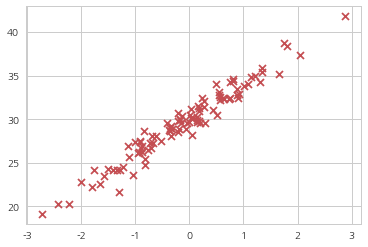

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y, c='r', marker='x')

### 3) create a model

In [16]:
x = x.reshape(100, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

w = model.coef_      # w = slope
b = model.intercept_ # b = bias

w, b                 # w is given as an array because y can be dependent on multiple variables

(array([ 4.05712161]), 30.015770810376829)

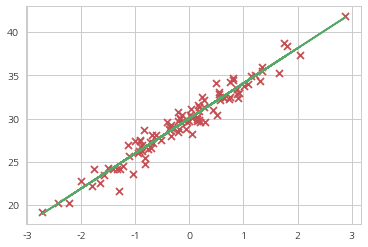

In [17]:
plt.scatter(x, y, c='r', marker='x')
plt.plot(x, w * x + b, 'g-')